In [25]:
%matplotlib inline

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC

plt.rcParams["figure.figsize"] = (9, 4)
sns.set_theme()

In [27]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
df = pd.read_csv('data/diabetes.csv', names=col_names, header=0)
df.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
y = df[df.columns[-1]]
X = df[df.columns[:-1]]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [30]:
# модель Логистической регрессии
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
y_logistic_pred = logistic_model.predict(X_test)

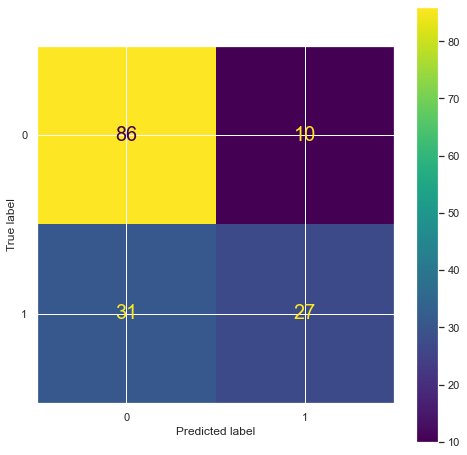

In [31]:
# матрица ошибок классификации
# (0, 0) - TN (True Negative) - верно предсказанные 0 (90)
# (0, 1) - FN (False Negative) - ошибочно предсказанные 0 (7)
# (1, 0) - FP (False Positive) - ошибочно предсказанные 1 (25)
# (1, 1) - TP (True Positive) - верно предсказанные 1 (32)
_, ax = plt.subplots(figsize=(8, 8))
matrix_display = metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_test, y_logistic_pred)).plot(ax=ax)
np.vectorize(lambda x: x.set_fontsize(20))(matrix_display.text_)
matrix_display

In [32]:
# достоверность: (TP + TN) / (TP + TN + FP + FN)
print(f'accuracy = {metrics.accuracy_score(y_test, y_logistic_pred):.3f}')
# точность: TP / (TP + FP)
print(f'precision = {metrics.precision_score(y_test, y_logistic_pred):.3f}')
# полнота: TP / (TP + FN)
print(f'recall = {metrics.recall_score(y_test, y_logistic_pred):.3f}')

accuracy = 0.734
precision = 0.730
recall = 0.466


In [33]:
# метод Опорных векторов
svc_model = SVC()
svc_model.fit(X_train, y_train)
y_svc_pred = svc_model.predict(X_test)

In [34]:
print(f'accuracy = {metrics.accuracy_score(y_test, y_svc_pred):.3f}')
print(f'precision = {metrics.precision_score(y_test, y_svc_pred):.3f}')
print(f'recall = {metrics.recall_score(y_test, y_svc_pred):.3f}')

accuracy = 0.721
precision = 0.778
recall = 0.362


In [35]:
from sklearn.exceptions import ConvergenceWarning
import warnings

with warnings.catch_warnings():
    warnings.simplefilter('ignore', category=ConvergenceWarning)

    # метод Опорных векторов (kernel='linear')
    linear_svc_model = LinearSVC()
    linear_svc_model.fit(X_train, y_train)
    y_linear_svc_pred = linear_svc_model.predict(X_test)

In [36]:
print(metrics.classification_report(y_test, y_linear_svc_pred))

              precision    recall  f1-score   support

           0       0.74      0.81      0.78        96
           1       0.63      0.53      0.58        58

    accuracy                           0.71       154
   macro avg       0.69      0.67      0.68       154
weighted avg       0.70      0.71      0.70       154



## Вывод

По метрикам логистическая регрессия является лучшей моделью из всех представленных. Но, наверное, предсказывать наличие болезни с вероятностью 15-20% не лучшая идея.